In [18]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# load business.json
filepath = '../../yelp_dataset'

business = []
for l in open(filepath+"/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)


In [20]:
# load data from previous preprocessing/EDA
filepath = '../../'

restaurant_tips = []
for l in open(filepath+"restaurant_tips.json", encoding="utf8").readlines():
    restaurant_tips.append(json.loads(l))
df_restaurant_tips= pd.DataFrame.from_records(restaurant_tips)


In [21]:
# Filter businesses that are only in the 'Restaurant' category
def check_for_rest(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Restaurants' in tokens
    return False

df_business['is_restaurant'] = df_business.apply(check_for_rest, axis=1)

food_businesses = df_business[df_business['is_restaurant'] == True]

# Get the unique IDs for all the businesses that are resturaunts
restaurant_ids  = set(food_businesses['business_id'].unique())

print('Total Unique ID count:',len(restaurant_ids))

Total Unique ID count: 59371


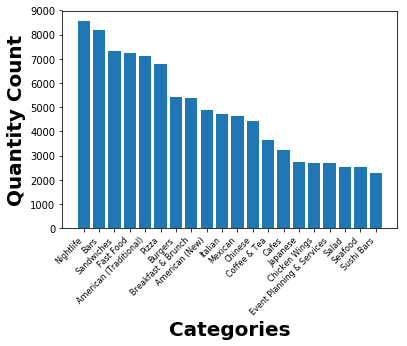

In [22]:
categories_series = food_businesses['categories']

cuisine_counts = {}
for _, categories in categories_series.iteritems():
    tokens = categories.split(', ')
    for category in tokens:
        if category == 'Restaurants'or category == 'Food':
            do = 'nothing' 
        elif category in cuisine_counts:
            cuisine_counts[category] += 1
        else:
            cuisine_counts[category] = 1

sorted_cuisine_counts = {k: v for k, v in sorted(cuisine_counts.items(), key=lambda item: item[1])}

top_20 = dict(list(sorted_cuisine_counts.items())[-20:]) 

x = list(top_20.keys())
x.reverse()
x = np.array(x)
y = list(top_20.values())
y.reverse()
y = np.array(y)


fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, x, color='black', rotation=45, fontsize='8', horizontalalignment='right')
plt.xlabel("Categories", fontweight='bold', fontsize='20')
plt.ylabel("Quantity Count", fontweight='bold', fontsize='20')

plt.show()

In [6]:
# Modifying DF['categories'] to make filtering more efficient
# def split_category(row):
#     return row['categories'].split(',  ')

# food_businesses['categories'] = food_businesses.apply(split_category, axis=1)

c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
# CUISINES WE WILL EXPLORE:
# Fast Food, American (Traditional), American (New), Italian, Mexican, Chinese, Japanese
def is_fast_food(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Fast Food' in tokens
    return False

def is_american_traditional(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (Traditional)' in tokens
    return False

def is_american_new(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (New)' in tokens
    return False

# Fast Food
food_businesses['is_fast_food'] = food_businesses.apply(is_fast_food, axis=1)
df_fast_food = food_businesses[food_businesses['is_fast_food'] == True]

# American (Traditional)
food_businesses['is_american_t'] = food_businesses.apply(is_american_traditional, axis=1)
df_american_t = food_businesses[food_businesses['is_american_t'] == True]

# American (New)
food_businesses['is_american_n'] = food_businesses.apply(is_american_new, axis=1)
df_american_n = food_businesses[food_businesses['is_american_n'] == True]

c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [54]:
# get tips for Fast Food mapped to business_id
fast_food_ids = set(df_fast_food.business_id.unique())
american_t_ids = set(df_american_t.business_id.unique())
american_n_ids = set(df_american_n.business_id.unique())

# group tips
cuisine_tips = {}
# cuisine_tips['fast_food'] = df_restaurant_tips[df_restaurant_tips['business_ids'].isin(fast_food_ids)]
# print(df_restaurant_tips)

#seperate into meal times


In [82]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def get_sentiment(sentence):
    dic = analyser.polarity_scores(sentence)
    # dic -> {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
    # for some reason only allows dictionary return type
    return dic
def get_positive_sentiment(sentence):
    dic = get_sentiment(sentence)
    return dic['pos']

{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}